# Confidence Intervals


This tutorial is going to demonstrate how to load data, clean/manipulate a dataset, and construct a confidence interval for the difference between two population proportions and means.

We will use the 2015-2016 wave of the NHANES data for our analysis.

*Note: We have provided a notebook that includes more analysis, with examples of confidence intervals for one population proportions and means, in addition to the analysis I will show you in this tutorial.  I highly recommend checking it out!

For our population proportions, we will analyze the difference of proportion between female and male smokers.  The column that specifies smoker and non-smoker is "SMQ020" in our dataset.

For our population means, we will analyze the difference of mean of body mass index within our female and male populations.  The column that includes the body mass index value is "BMXBMI".

Additionally, the gender is specified in the column "RIAGENDR".

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)

### Investigating and Cleaning Data

In [3]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["SMQ020x"]

0       Yes
1       Yes
2       Yes
3        No
4        No
5        No
6       Yes
7        No
8        No
9        No
10      Yes
11      Yes
12      Yes
13       No
14       No
15       No
16       No
17       No
18      Yes
19       No
20       No
21       No
22      Yes
23       No
24       No
25       No
26      Yes
27      Yes
28       No
29       No
       ... 
5705    Yes
5706    Yes
5707     No
5708     No
5709    Yes
5710     No
5711    Yes
5712     No
5713     No
5714     No
5715     No
5716    Yes
5717    Yes
5718     No
5719    Yes
5720     No
5721     No
5722     No
5723    Yes
5724     No
5725     No
5726    Yes
5727     No
5728     No
5729     No
5730    Yes
5731     No
5732    Yes
5733    Yes
5734     No
Name: SMQ020x, Length: 5735, dtype: object

In [4]:
# Recode RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
#da["RIAGENDRx"]

In [5]:
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [6]:
# Recode SMQ020x from Yes/No to 1/0 into existing variable SMQ020x
dx["SMQ020x"] = dx.SMQ020x.replace({"Yes": 1, "No": 0})

In [7]:
dz = dx.groupby("RIAGENDRx").agg({"SMQ020x": [np.mean, np.size]})
dz.columns = ["Proportion", "Total n"]
dz

,Proportion,Total n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


### Constructing Confidence Intervals

Now that we have the population proportions of male and female smokers, we can begin to calculate confidence intervals.  From lecture, we know that the equation is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** from the sample and the *Margin of Error* is the **t-multiplier**.

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

The Standard Error (SE) is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Lastly, the standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$

#### Difference of Two Population Proportions

In [8]:
p = .304845
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.00844415041930423

In [9]:
p = .513258
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078787008965

In [10]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729880335656654

In [11]:
d = .304845 - .513258
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.23336356545788706, -0.18346243454211297)

#### Difference of Two Population Means

In [23]:
da["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [24]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [25]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [26]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538993598139303

In [27]:
d = 29.939946 - 28.778072

In [28]:
lcb = d - 1.96 * sem_diff
ucb = d + 1.96 * sem_diff
(lcb, ucb)

(0.798509725476467, 1.5252382745235278)

### paired data MEAN difference

In [46]:
a = np.random.normal(size=500)
b = np.random.normal(size=500)
diff = a-b

diff_mean = diff.mean()
diff_std = diff.std()
print(diff_mean,diff_std)

conf_intervals_diff = sm.stats.DescrStatsW(diff).tconfint_mean()
print(conf_intervals_diff)

-0.0033660069336399873 1.4725311062629765
(-0.1328800755950678, 0.12614806172778778)


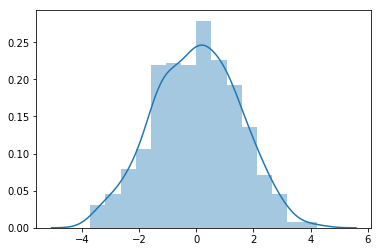

In [47]:
sns.distplot(diff)